In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_train_data = pd.read_csv('..\\kaggle_data\\train.csv')
raw_test_data = pd.read_csv('..\\kaggle_data\\test.csv')
raw_sample_submission_data = pd.read_csv('..\\kaggle_data\\sample_submission.csv')

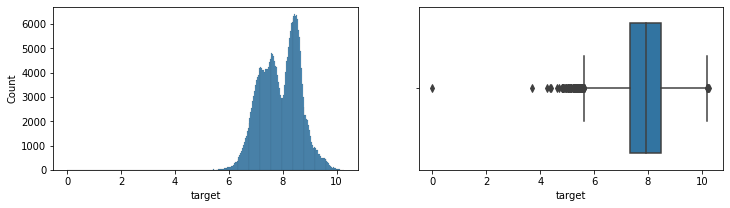

In [3]:
fig,ax = plt.subplots(1,2, figsize=(12,3))
sns.histplot(x=raw_train_data.target, ax=ax[0])
sns.boxplot(x=raw_train_data.target, ax=ax[1])
plt.show()

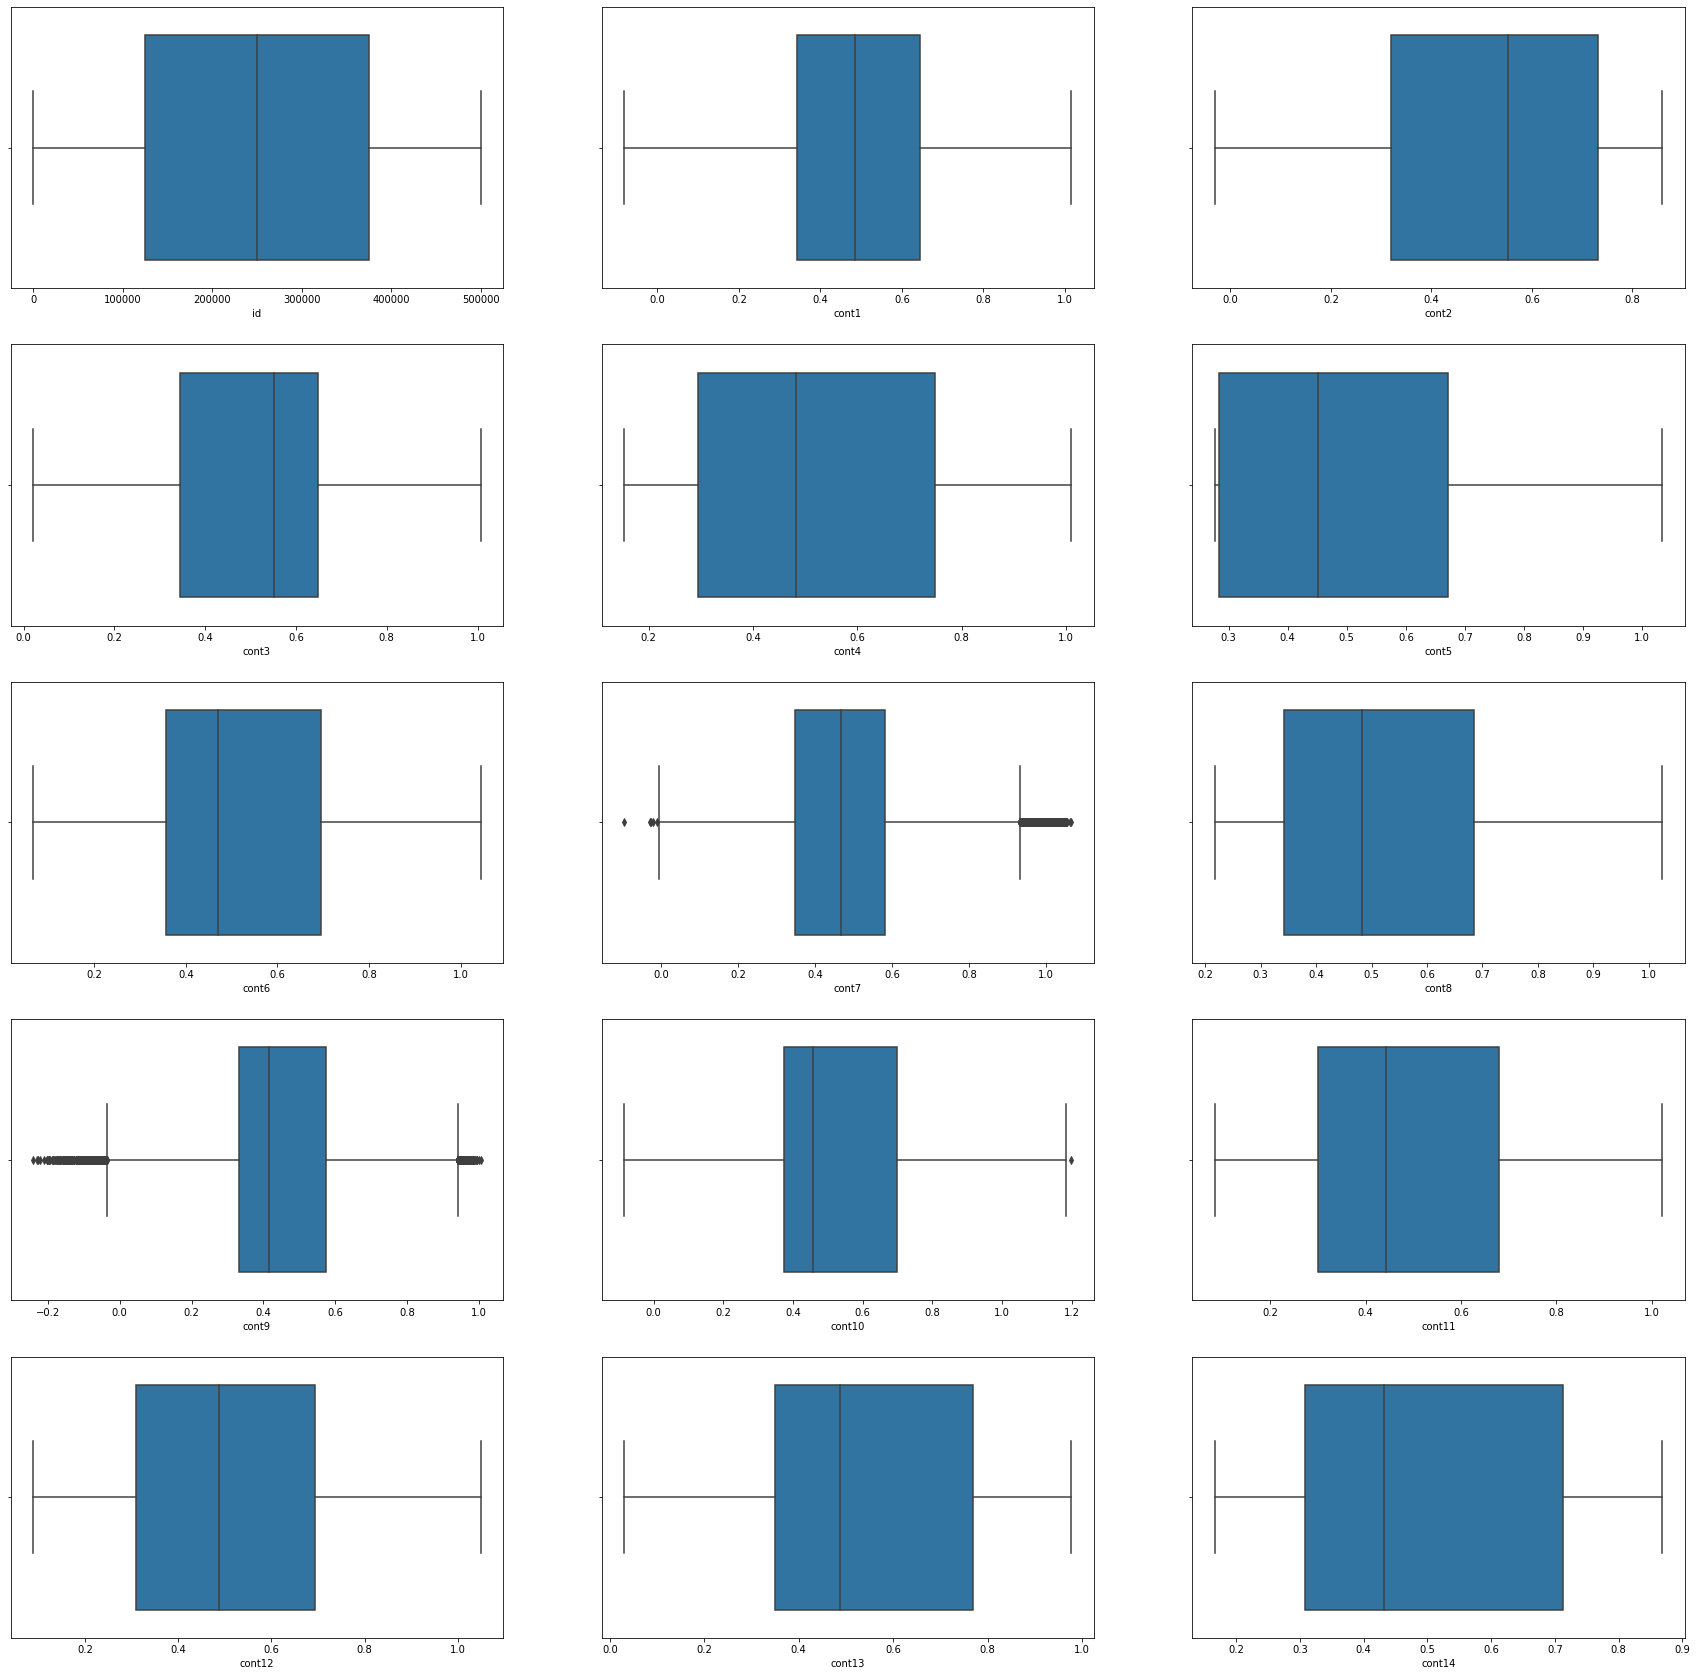

In [4]:
fig,axes = plt.subplots(5,3, figsize=(30,30))
sns.boxplot(x=raw_train_data.id, ax=axes[0,0])
sns.boxplot(x=raw_train_data.cont1, ax=axes[0,1])
sns.boxplot(x=raw_train_data.cont2, ax=axes[0,2])
sns.boxplot(x=raw_train_data.cont3, ax=axes[1,0])
sns.boxplot(x=raw_train_data.cont4, ax=axes[1,1])
sns.boxplot(x=raw_train_data.cont5, ax=axes[1,2])
sns.boxplot(x=raw_train_data.cont6, ax=axes[2,0])
sns.boxplot(x=raw_train_data.cont7, ax=axes[2,1])
sns.boxplot(x=raw_train_data.cont8, ax=axes[2,2])
sns.boxplot(x=raw_train_data.cont9, ax=axes[3,0])
sns.boxplot(x=raw_train_data.cont10, ax=axes[3,1])
sns.boxplot(x=raw_train_data.cont11, ax=axes[3,2])
sns.boxplot(x=raw_train_data.cont12, ax=axes[4,0])
sns.boxplot(x=raw_train_data.cont13, ax=axes[4,1])
sns.boxplot(x=raw_train_data.cont14, ax=axes[4,2])
plt.show()

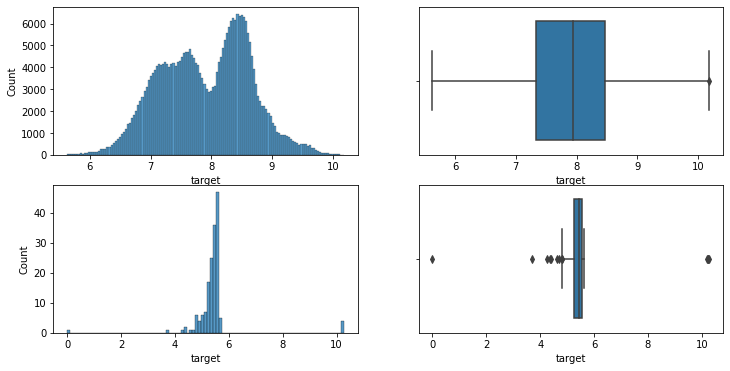

In [5]:
included_entries = raw_train_data[(np.abs(stats.zscore(raw_train_data['target'])) < 3.11)]
excluded_entries = raw_train_data[(np.abs(stats.zscore(raw_train_data['target'])) > 3.11)]
fig,ax = plt.subplots(2,2, figsize=(12,6))
sns.histplot(x=included_entries.target, ax=ax[0][0])
sns.boxplot(x=included_entries.target, ax=ax[0][1])
sns.histplot(x=excluded_entries.target, ax=ax[1][0])
sns.boxplot(x=excluded_entries.target, ax=ax[1][1])
plt.show()

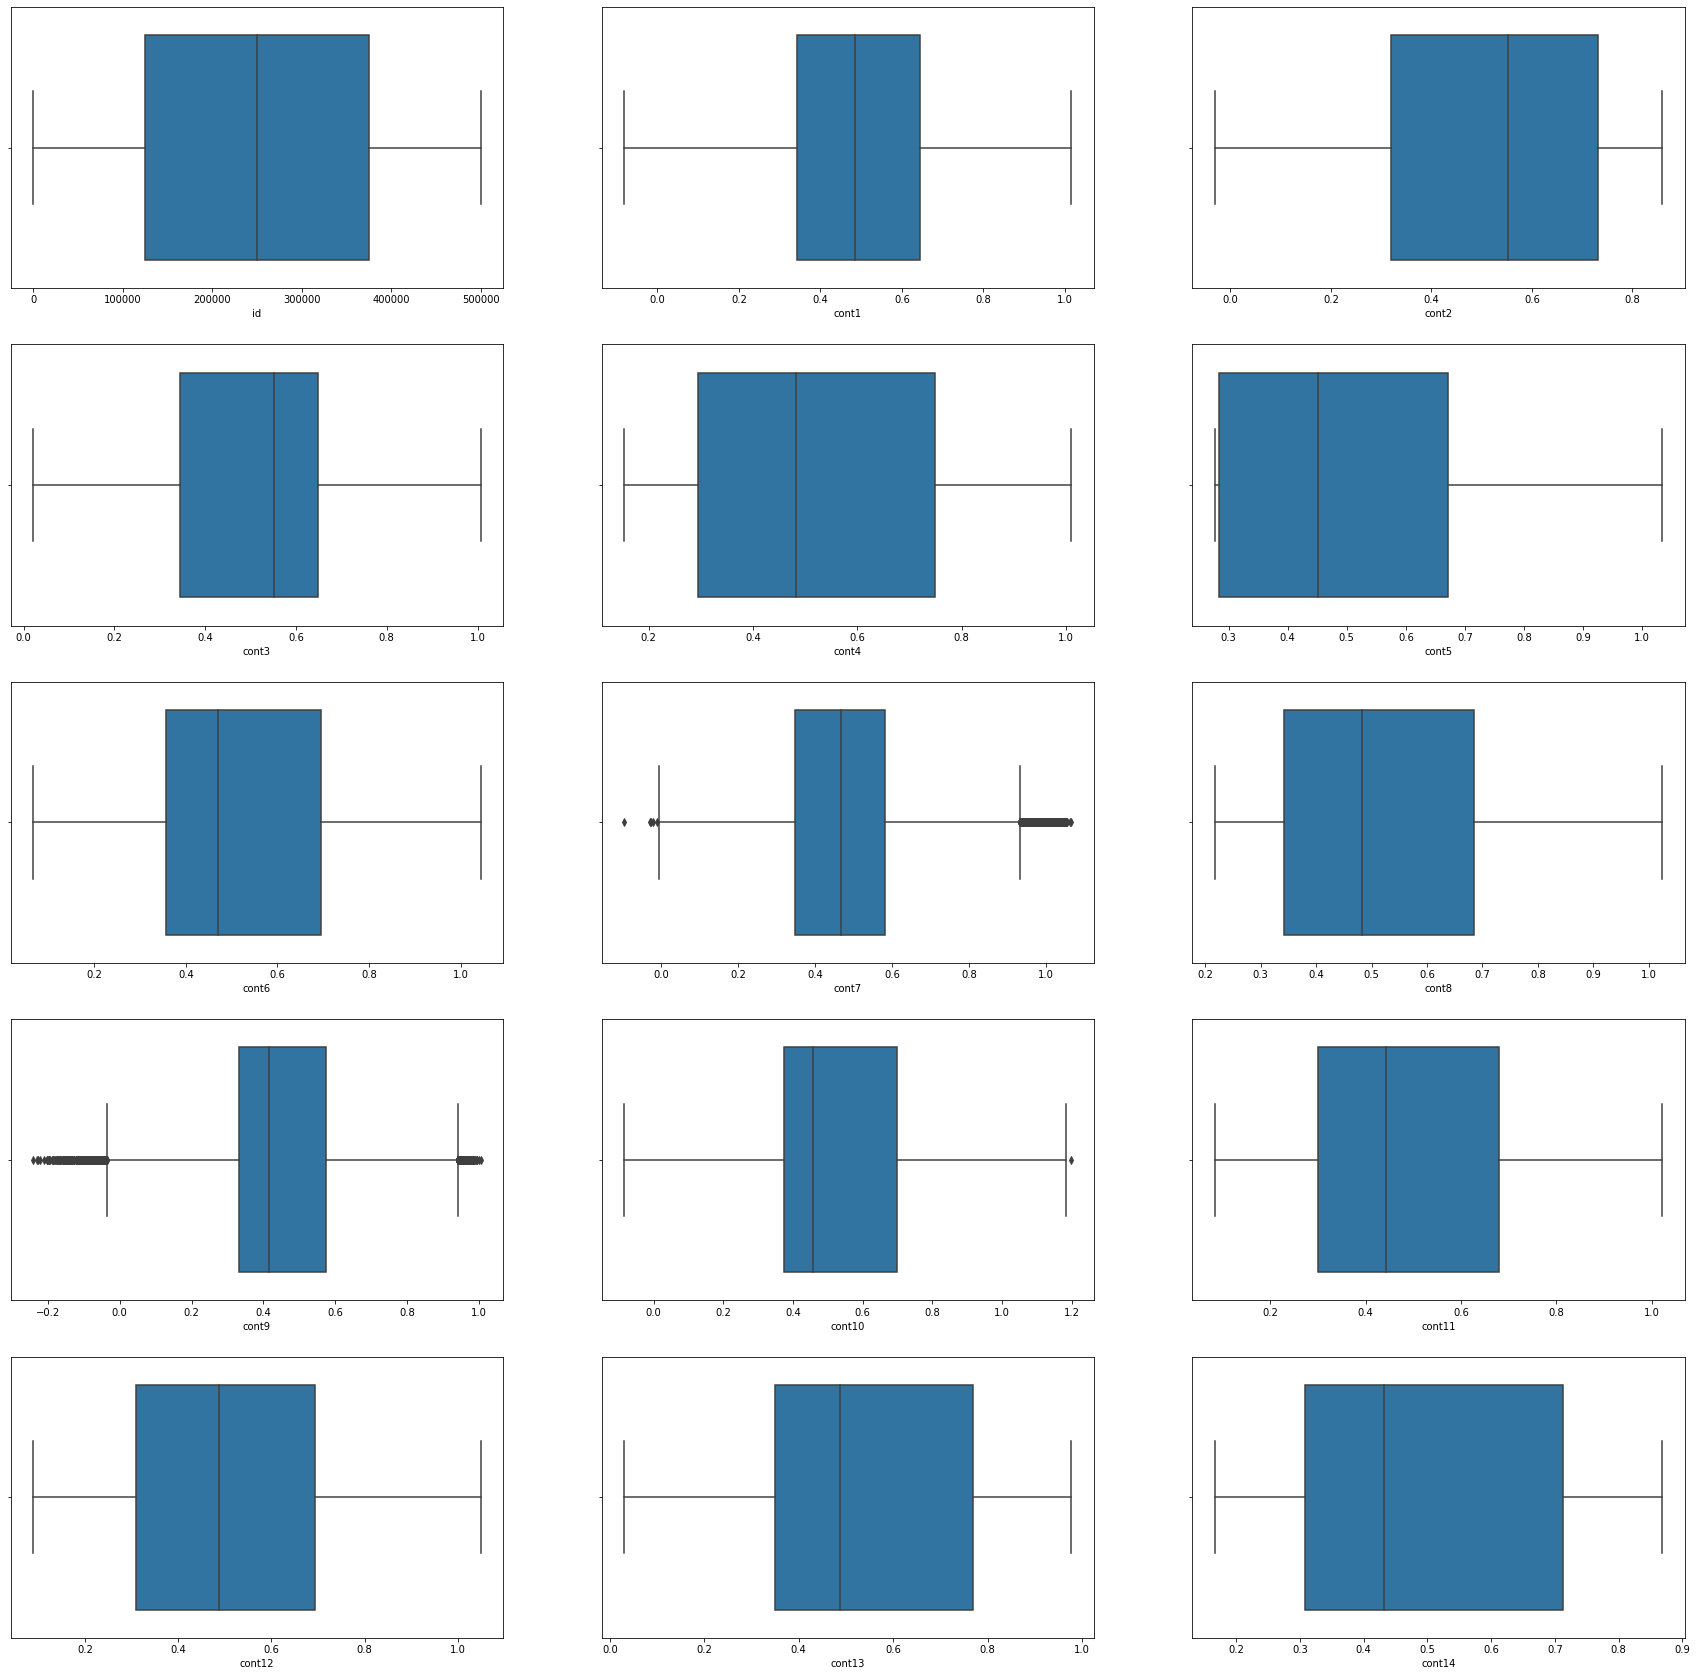

In [6]:
fig,axes = plt.subplots(5,3, figsize=(30,30))
sns.boxplot(x=included_entries.id, ax=axes[0,0])
sns.boxplot(x=included_entries.cont1, ax=axes[0,1])
sns.boxplot(x=included_entries.cont2, ax=axes[0,2])
sns.boxplot(x=included_entries.cont3, ax=axes[1,0])
sns.boxplot(x=included_entries.cont4, ax=axes[1,1])
sns.boxplot(x=included_entries.cont5, ax=axes[1,2])
sns.boxplot(x=included_entries.cont6, ax=axes[2,0])
sns.boxplot(x=included_entries.cont7, ax=axes[2,1])
sns.boxplot(x=included_entries.cont8, ax=axes[2,2])
sns.boxplot(x=included_entries.cont9, ax=axes[3,0])
sns.boxplot(x=included_entries.cont10, ax=axes[3,1])
sns.boxplot(x=included_entries.cont11, ax=axes[3,2])
sns.boxplot(x=included_entries.cont12, ax=axes[4,0])
sns.boxplot(x=included_entries.cont13, ax=axes[4,1])
sns.boxplot(x=included_entries.cont14, ax=axes[4,2])
plt.show()

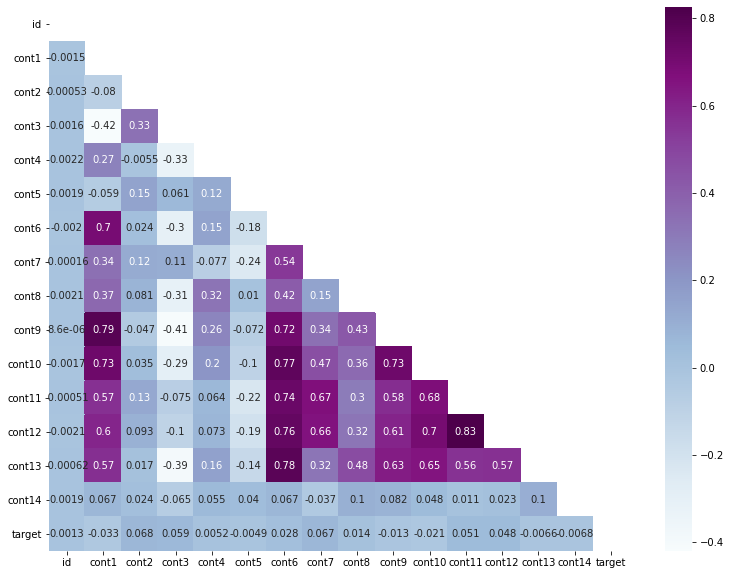

In [7]:
corr=included_entries.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(corr,cmap="BuPu", mask=mask, annot=True)
plt.show()

In [15]:
x = included_entries.drop(["target","id"],axis=1)
y = included_entries.target

In [ ]:
import catboost as ctb
model = ctb.CatBoostRegressor(iterations=5000)
model.fit(x,y)

Learning rate set to 0.031701
0:	learn: 0.7300443	total: 29.5ms	remaining: 2m 27s
1:	learn: 0.7294812	total: 59.3ms	remaining: 2m 28s
2:	learn: 0.7289212	total: 84.3ms	remaining: 2m 20s
3:	learn: 0.7284293	total: 112ms	remaining: 2m 20s
4:	learn: 0.7279190	total: 139ms	remaining: 2m 18s
5:	learn: 0.7274781	total: 164ms	remaining: 2m 16s
6:	learn: 0.7270422	total: 189ms	remaining: 2m 15s
7:	learn: 0.7265674	total: 214ms	remaining: 2m 13s
8:	learn: 0.7261854	total: 246ms	remaining: 2m 16s
9:	learn: 0.7258075	total: 276ms	remaining: 2m 17s
10:	learn: 0.7254354	total: 308ms	remaining: 2m 19s
11:	learn: 0.7251107	total: 335ms	remaining: 2m 19s
12:	learn: 0.7247927	total: 362ms	remaining: 2m 18s
13:	learn: 0.7244705	total: 389ms	remaining: 2m 18s
14:	learn: 0.7241607	total: 416ms	remaining: 2m 18s
15:	learn: 0.7238793	total: 443ms	remaining: 2m 17s
16:	learn: 0.7235962	total: 468ms	remaining: 2m 17s
17:	learn: 0.7233177	total: 516ms	remaining: 2m 22s
18:	learn: 0.7230739	total: 547ms	remaini

In [10]:
raw_test_data.astype({'id': 'int32'}).dtypes
vector_data = raw_test_data[
    ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
     'cont13', 'cont14']] 

In [11]:
preds = model.predict(vector_data)

In [12]:
result = []
x = 0
for index, row in raw_test_data.iterrows():
    result.append([int(row['id']), preds[x]])
    x += 1

In [13]:
from datetime import datetime
dt_string = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")

final_df = pd.DataFrame(result, columns=['id', 'target'])
final_df.to_csv(f'..\\kaggle_data\\{dt_string}_submission.csv', index=False)

final_df.head()

,id,target
0,0,7.957226
1,2,7.858922
2,6,7.920113
3,7,8.239277
4,10,8.169220


In [ ]:
sult = pd.read_csv('sult.csv')
sult2 = pd.read_csv('sult2.csv')

In [ ]:
import math
import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(sult, sult2 )

rmse = math.sqrt(mse)

print(rmse)